In [1]:
import pandas as pd
import numpy as np
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
df = pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [5]:
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [8]:
df.isnull().sum()

Text    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


## DATA CLEANING

In [10]:
#Removing the unnecessary punctuation tags
tweet = [Text.strip() for Text in df.Text]
tweet = [Text for Text in tweet if Text]
tweet[0:10]
text = ''.join(tweet)
len(text)

156807

In [11]:
no_punc_text = text.translate(str.maketrans('','', string.punctuation))
no_punc_text

'kunalb11 I’m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It’s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk import sent_tokenize
from nltk import word_tokenize

In [14]:
sentences = sent_tokenize(text)
print(len(sentences))
sentences

848


['@kunalb11 I’m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!',
 '!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It’s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U

In [15]:
words = word_tokenize(text)
print(len(words))

29173


In [16]:
print(words[0:50])

['@', 'kunalb11', 'I', '’', 'm', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the']


In [17]:
from nltk.probability import FreqDist

fdist = FreqDist(words)

#Print 10 most common words
fdist.most_common(10)

[('@', 3264),
 (':', 809),
 (',', 662),
 ('https', 632),
 ('.', 604),
 ('the', 404),
 ('to', 390),
 ('is', 348),
 ('a', 325),
 ('<', 310)]

### Frequency PLot

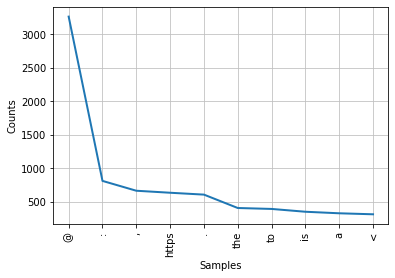

In [18]:
# Plot the graph for fdist
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove Punctuation Marks

In [19]:
# Empty list to store words
word_no_punc = []

# Remove punctuation marks
for w in words:
  if w.isalpha():
    word_no_punc.append(w.lower())

# Print the words without punctuation marks
print(word_no_punc[0:50])
print("\n")

# length
print(len(word_no_punc))

['i', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'https', 'was', 'the', 'underdoge', 'all']


19077


### Plotting Graph without Punctuation marks

In [20]:
# Frequency Distribution
fdist  = FreqDist(word_no_punc)

fdist.most_common(10)

[('https', 632),
 ('the', 470),
 ('to', 395),
 ('is', 349),
 ('a', 344),
 ('of', 307),
 ('spacex', 246),
 ('amp', 219),
 ('in', 212),
 ('for', 190)]

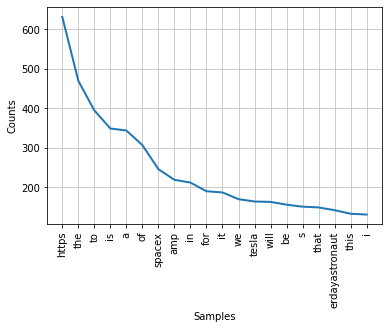

In [21]:
fdist.plot(20)

### List of stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

# List of stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Removig Stopwords

In [25]:
# Empty List to store clean words
clean_words = []

for w in word_no_punc:
  if w not in stopwords:
    clean_words.append(w)

print(clean_words[0:50])
print("\n")
print(len(clean_words))

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'https', 'underdoge', 'thought', 'would', 'fail', 'https', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'time', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'somejust', 'agree', 'clubhouse', 'kanyewesthttps']


12527


### Final Frequency Distribution:

In [26]:
fdist = FreqDist(clean_words)

fdist.most_common(20)

[('https', 632),
 ('spacex', 246),
 ('amp', 219),
 ('tesla', 164),
 ('erdayastronaut', 142),
 ('ppathole', 123),
 ('flcnhvy', 114),
 ('yes', 77),
 ('teslaownerssv', 73),
 ('great', 71),
 ('wholemarsblog', 68),
 ('teslarati', 59),
 ('nasaspaceflight', 55),
 ('good', 49),
 ('launch', 46),
 ('haha', 45),
 ('yeah', 40),
 ('cleantechnica', 40),
 ('would', 39),
 ('sure', 38)]

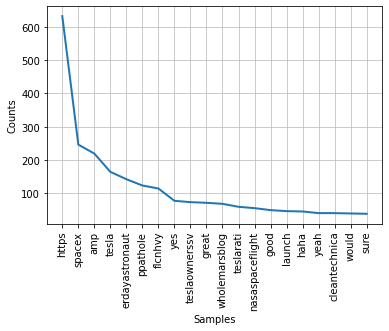

In [27]:
fdist.plot(20)

### WordCloud

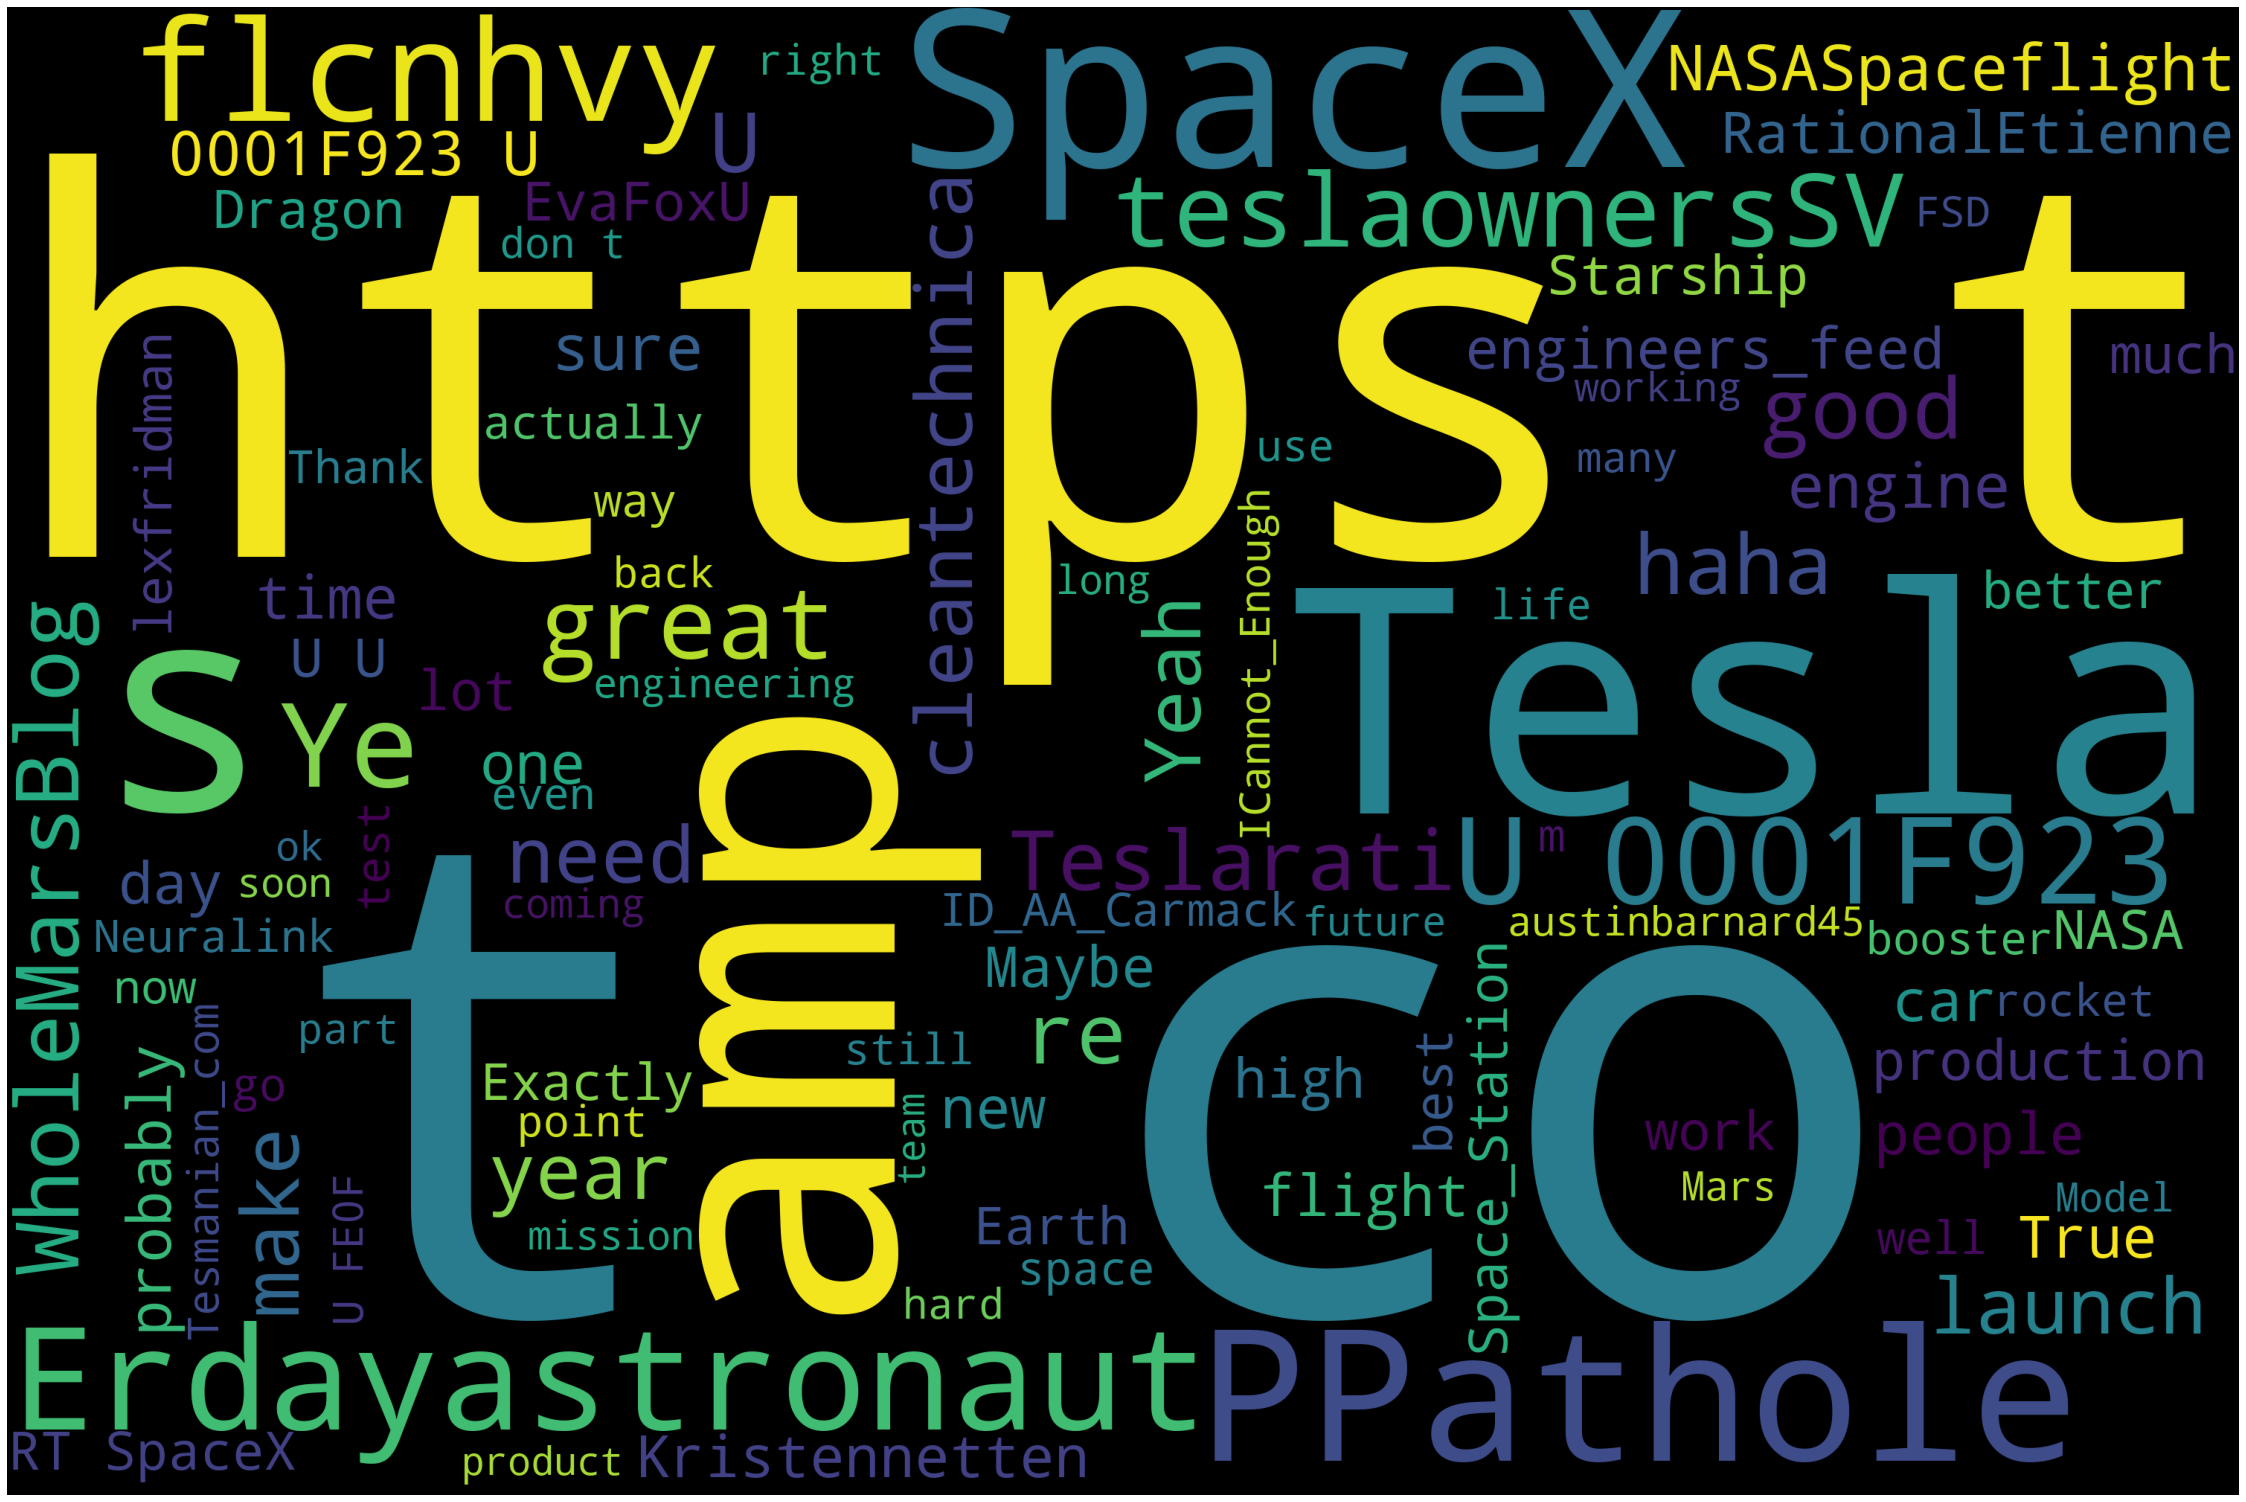

In [28]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

stopwords = STOPWORDS
stopwords.add('will')    
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, stopwords=stopwords).generate(text)
word_cloud(wordcloud)

## Stemming

In [29]:
# Import stemming library:
from nltk.stem import PorterStemmer

stemmed_tokens=[PorterStemmer().stem(word) for word in words]
print(stemmed_tokens[0:50])

['@', 'kunalb11', 'i', '’', 'm', 'an', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next-level', '.', 'have', 'you', 'tri', 'it', '?', '@', 'joerogan', '@', 'spotifi', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'is', 'underestim', '@', 'teslacn', 'congratul', 'tesla', 'china', 'for', 'amaz', 'execut', 'last', 'year', '.', 'now', 'on', 'to', 'the']


## Lemmatization

In [30]:
nlp = spacy.load('en_core_web_sm')

In [31]:
doc = nlp(' '.join(clean_words))
print(doc[0:40])

alien ray tracing cyberpunk hdr tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https underdoge thought would fail https flcnhvy haha thanks flcnhvy indeed tweets definitely represent


In [32]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'try', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year']


## FEATURE EXTRACTION

## BAG OF WORDS (BOW)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [34]:
print(vectorizer.vocabulary_)

{'alien': 91, 'ray': 2434, 'trace': 3191, 'cyberpunk': 709, 'hdr': 1351, 'try': 3227, 'joerogan': 1594, 'spotify': 2850, 'great': 1293, 'interview': 1539, 'doge': 843, 'underestimate': 3272, 'teslacn': 3059, 'congratulations': 619, 'tesla': 3055, 'china': 514, 'amazing': 112, 'execution': 1032, 'last': 1677, 'year': 3496, 'next': 2022, 'even': 1005, 'happy': 1338, 'new': 2019, 'ox': 2162, 'https': 1415, 'underdoge': 3271, 'think': 3114, 'would': 3476, 'fail': 1062, 'flcnhvy': 1131, 'haha': 1319, 'thank': 3088, 'indeed': 1480, 'tweet': 3242, 'definitely': 754, 'represent': 2506, 'time': 3135, 'entertain': 963, 'outcome': 2139, 'likely': 1725, 'givedirectly': 1266, 'send': 2661, 'somejust': 2793, 'agree': 68, 'clubhouse': 554, 'kanyewesthttps': 1622, 'geoffkeighley': 1245, 'unrealengine': 3298, 'getting': 1251, 'realbought': 2445, 'dogecoin': 846, 'lil': 1729, 'toddler': 3154, 'hodler': 1391, 'joshmanmode': 1602, 'issue': 1555, 'sentencing': 2667, 'seem': 2657, 'bit': 341, 'high': 1380, 

In [35]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'afloathickory', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ahemunless', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'airrt', 'ajtourville', 'ak', 'aka', 'akidesir', 'akinfermo', 'alandail', 'alert', 'alexander', 'alexandersibert', 'alexsvanart', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'allocation', 'allow', 'alloy', 'almost', 'alone', 'along']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(X.toarray().shape)

(12528, 3530)


## BI-GRAM AND TRI-GRAM

In [37]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [38]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['text']
[[1]]


## TF-IDF VECTORIZER

In [39]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [40]:
df

,000,0001f1e9,0001f1ea,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4af,0001f525,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.354775,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845719,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
